<a href="https://colab.research.google.com/github/ssanchellaa/ML_MAI_LABS/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа 2**

Выполнила: Серякова Александра М8O-309Б-22





1.   Импортируем необходимые библиотеки для анализа данных, предобработки и создания модели




In [ ]:
!pip install catboost

In [ ]:
%pip install dask[dataframe]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler


* numpy и pandas: Эти библиотеки используются для обработки и анализа данных. numpy предоставляет функциональность для работы с многомерными массивами, а pandas — для работы с таблицами (DataFrame).
* train_test_split: Функция из библиотеки sklearn, которая используется для разделения данных на обучающую и тестовую выборки.



# Модели классификации:
* LogisticRegression, SVC, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier: Все эти модели классификации импортированы из библиотеки sklearn.
* XGBClassifier, lgb.LGBMClassifier, CatBoostClassifier: Эти модели импортированы из библиотек xgboost, lightgbm и catboost соответственно.
# Метрики:
Из sklearn.metrics импортированы функции для расчета различных метрик качества модели: точности (accuracy), точности классификации (precision), полноты (recall), F1-меры (f1_score), а также для вычисления матрицы ошибок (confusion_matrix).
# seaborn и matplotlib:
Библиотеки для визуализации данных, включая тепловую карту для матрицы ошибок.

* Реализация линейного классификатора (логистическая регрессия)

In [ ]:

class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.epochs):
            model = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(model)

            dw = (1 / num_samples) * np.dot(X.T, (predictions - y))
            db = (1 / num_samples) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self._sigmoid(model)
        return [1 if i > 0.5 else 0 for i in predictions]

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

# 2. Загрузка данных и первичная обработка



*   Загружаем тренировочный набор данных для обучения модели
*   Загружаем тестовый набор данных для предсказания финальных значений








In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train = df_train.dropna().drop_duplicates()
df_test = df_test.dropna().drop_duplicates()

Преобразуем категориальные данные в числовые

In [ ]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

* Визуализация распределения значений в данных

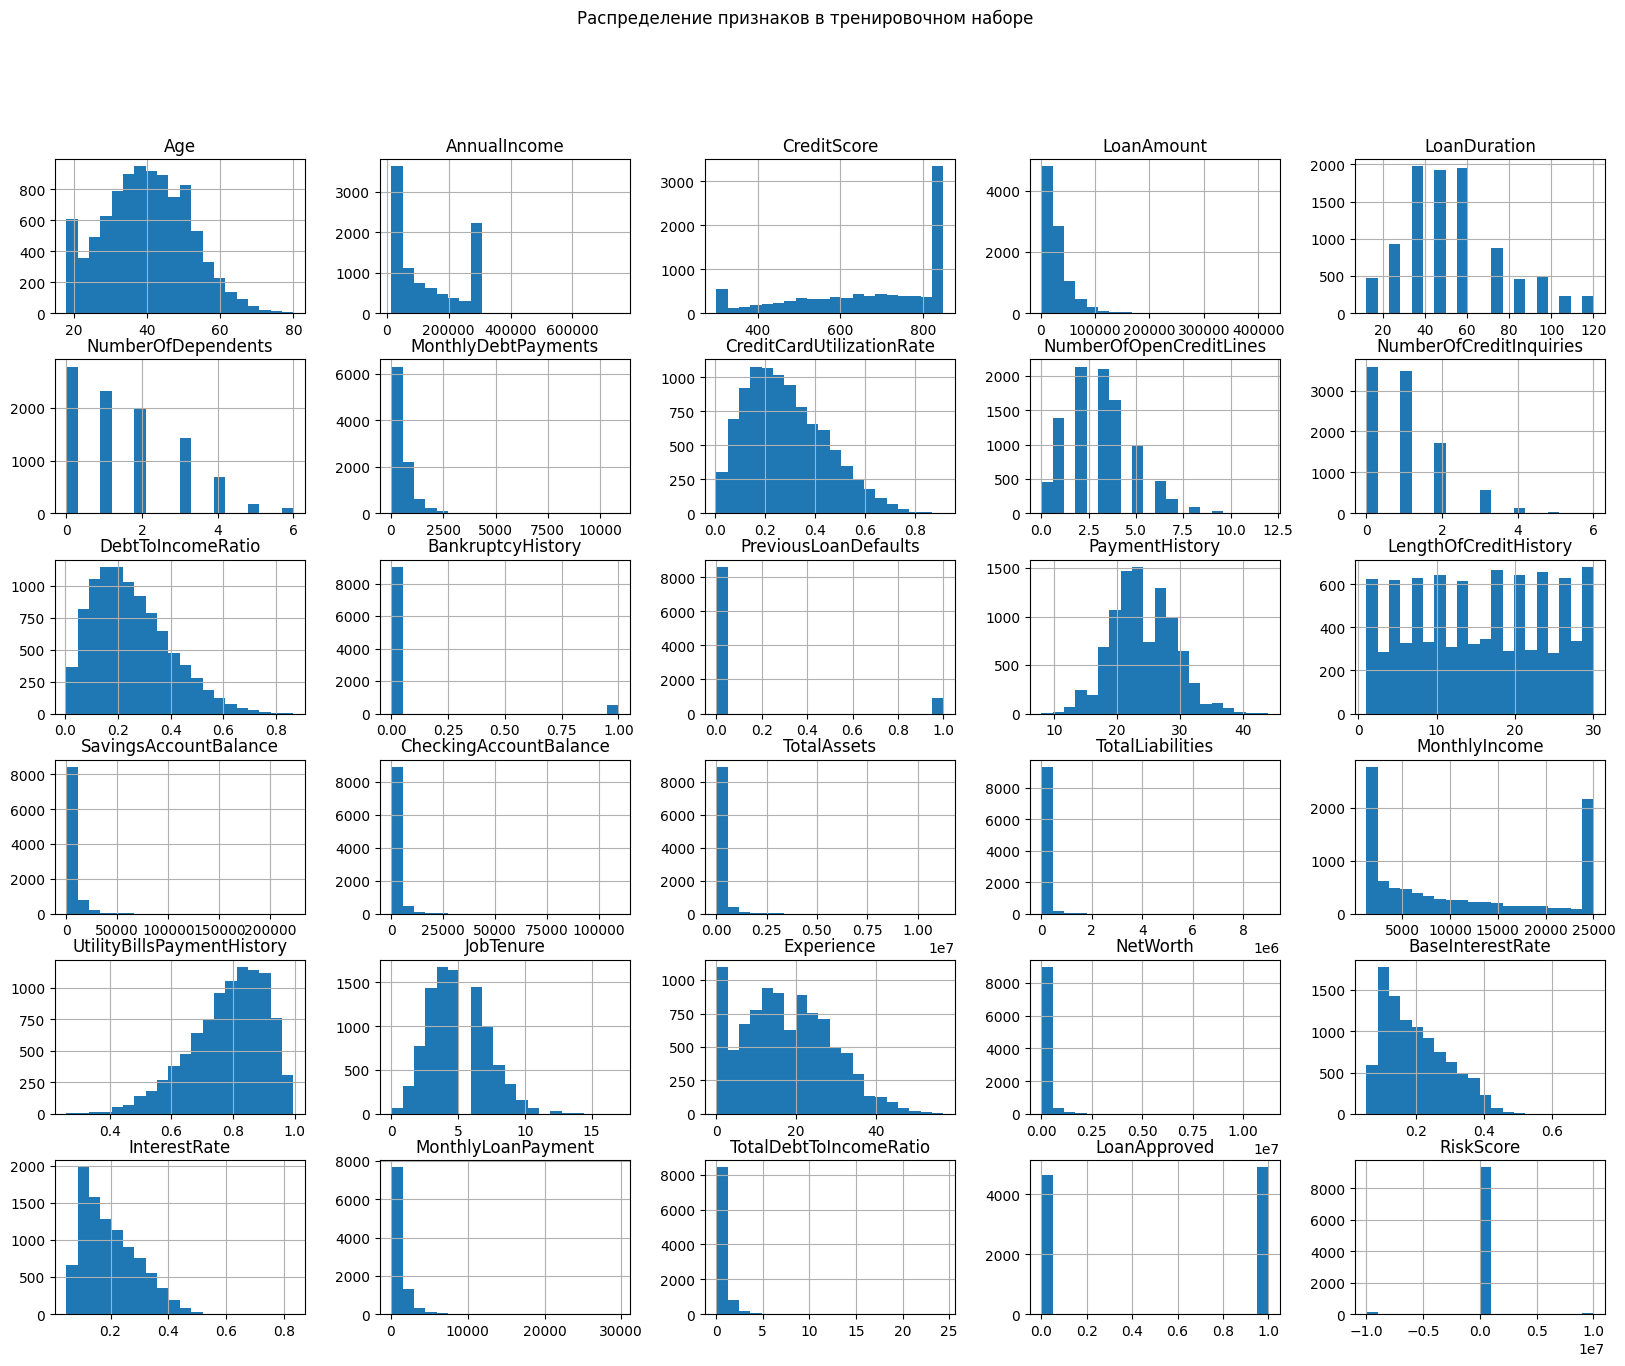

In [ ]:
df_train.hist(bins=20, figsize=(20, 15))
plt.suptitle('Распределение признаков в тренировочном наборе')
plt.show()

Визуализация распределения значений в данных


In [ ]:
X = df_train.drop('LoanApproved', axis=1)
y = df_train['LoanApproved']

In [ ]:
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Разделение на тренировочную и тестовую выборки
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Логистическая регрессия (собственная реализация)

In [ ]:
log_reg_custom = LogisticRegressionCustom(learning_rate=0.01, epochs=1000)
log_reg_custom.fit(X_train, y_train)
y_pred_log_reg_custom = log_reg_custom.predict(X_val)


# Логистическая регрессия (sklearn)

In [ ]:
log_reg_sklearn = LogisticRegression(max_iter=1000)
log_reg_sklearn.fit(X_train, y_train)
y_pred_log_reg_sklearn = log_reg_sklearn.predict(X_val)

# Градиентный бустинг (sklearn)

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_val)

# LightGBM

In [ ]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3903, number of negative: 3720
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4878
[LightGBM] [Info] Number of data points in the train set: 7623, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512003 -> initscore=0.048022
[LightGBM] [Info] Start training from score 0.048022


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)

# CatBoost

In [ ]:
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, verbose=0)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_val)

# Машина опорных векторов (SVM)

In [ ]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)

# Решающее дерево

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_val)

# Случайный лес

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

# Наивный байесовский классификатор

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_val)

# K-Nearest Neighbors (KNN)

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_val)

# Метрики для всех моделей

In [ ]:
def get_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1': f1_score(y_true, y_pred)
    }

* Собираем метрики для всех моделей

In [ ]:
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

models = {
    'Logistic Regression (Custom)': (log_reg_custom, y_pred_log_reg_custom),
    'Logistic Regression (sklearn)': (log_reg_sklearn, y_pred_log_reg_sklearn),
    'Gradient Boosting': (gb_model, y_pred_gb),
    'LightGBM': (lgbm_model, y_pred_lgbm),
    'XGBoost': (xgb_model, y_pred_xgb),
    'CatBoost': (catboost_model, y_pred_catboost),
    'SVM': (svm_model, y_pred_svm),
    'Decision Tree': (dt_model, y_pred_dt),
    'Random Forest': (rf_model, y_pred_rf),
    'Naive Bayes': (nb_model, y_pred_nb),
    'KNN': (knn_model, y_pred_knn)
}

In [ ]:
import pandas as pd

# Изначальный DataFrame для хранения метрик
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

for model_name, (model, y_pred) in models.items():
    metrics = get_metrics(y_val, y_pred)
    new_row = pd.DataFrame([{
        'Model': model_name,
        'Accuracy': metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1': metrics['f1']
    }])

    # Убираем столбцы с NaN значениями перед объединением
    new_row_cleaned = new_row.dropna(axis=1, how='all')

    # Объединяем с основной таблицей
    metrics_df = pd.concat([metrics_df, new_row_cleaned], ignore_index=True)

print(metrics_df)




                            Model  Accuracy  Precision    Recall        F1
0    Logistic Regression (Custom)  0.901364   0.898406  0.912955  0.905622
1   Logistic Regression (sklearn)  0.903463   0.903614  0.910931  0.907258
2               Gradient Boosting  0.987408   0.987854  0.987854  0.987854
3                        LightGBM  0.992130   0.994914  0.989879  0.992390
4                         XGBoost  0.992655   0.996939  0.988866  0.992886
5                        CatBoost  0.992655   0.994919  0.990891  0.992901
6                             SVM  0.881952   0.854225  0.931174  0.891041
7                   Decision Tree  0.983211   0.988753  0.978745  0.983723
8                   Random Forest  0.956978   0.950298  0.967611  0.958877
9                     Naive Bayes  0.482162   1.000000  0.001012  0.002022
10                            KNN  0.833683   0.824155  0.863360  0.843302


<ipython-input-25-0737ae6ef39d>:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, new_row_cleaned], ignore_index=True)


# Визуализация confusion matrix для всех моделей

In [ ]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

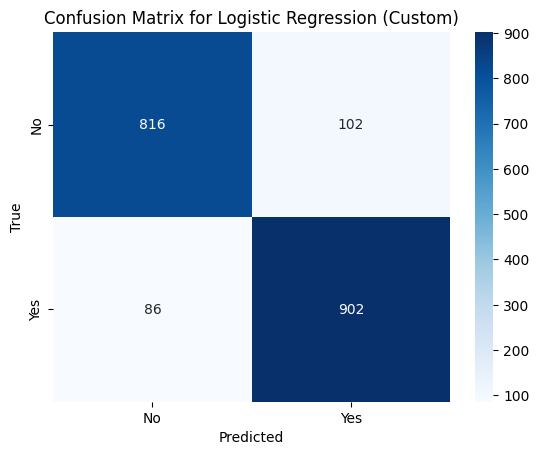

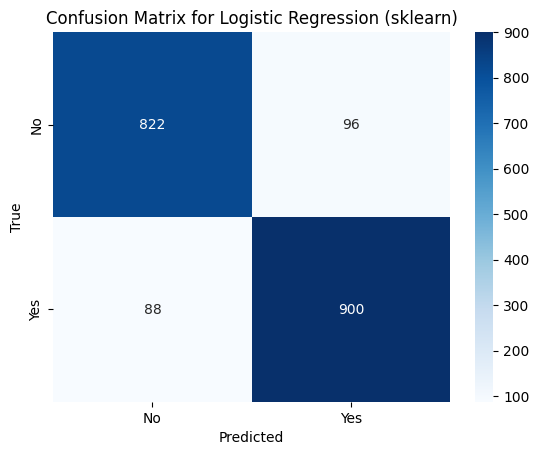

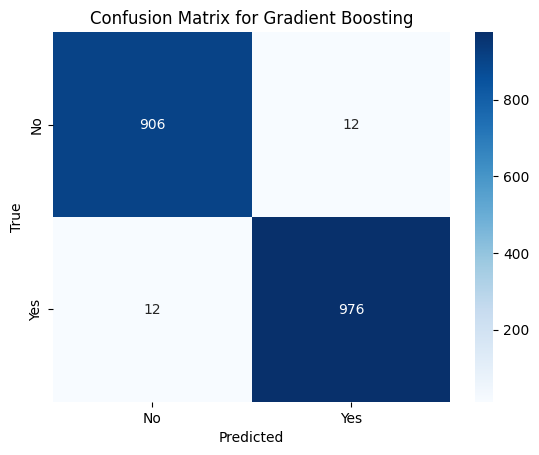

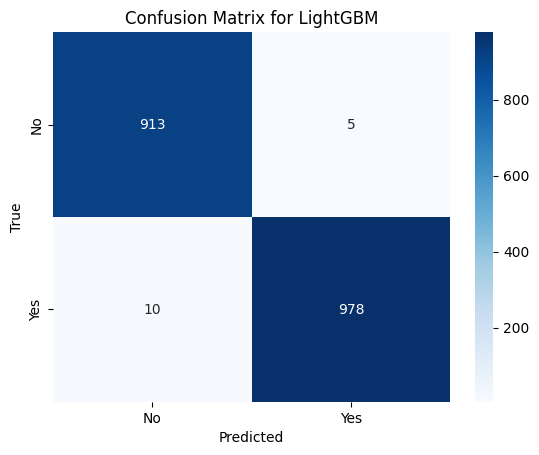

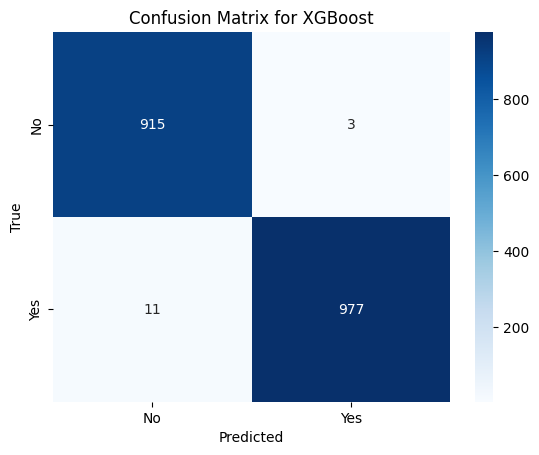

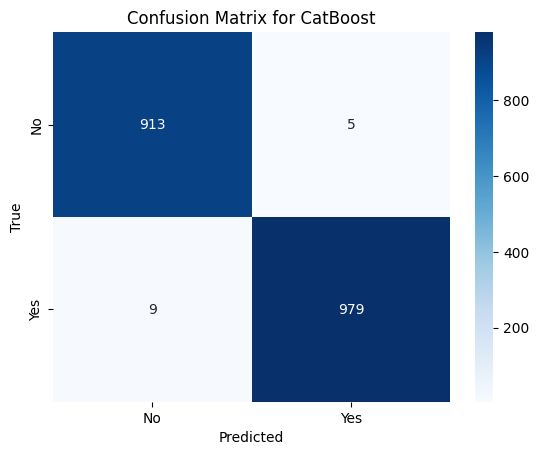

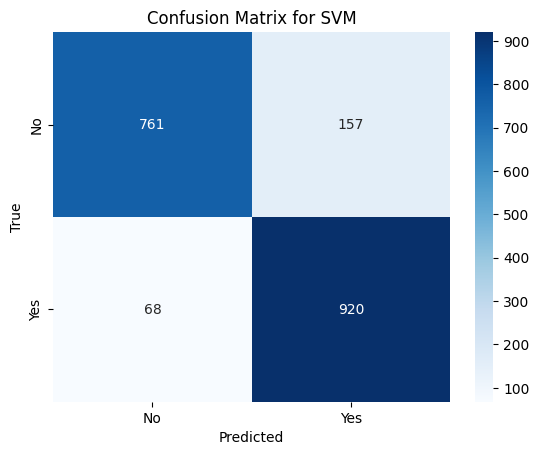

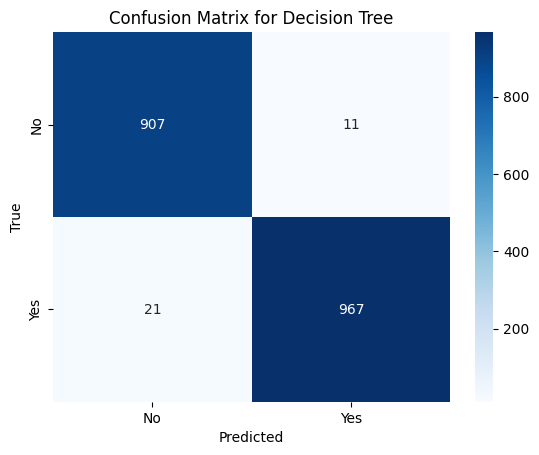

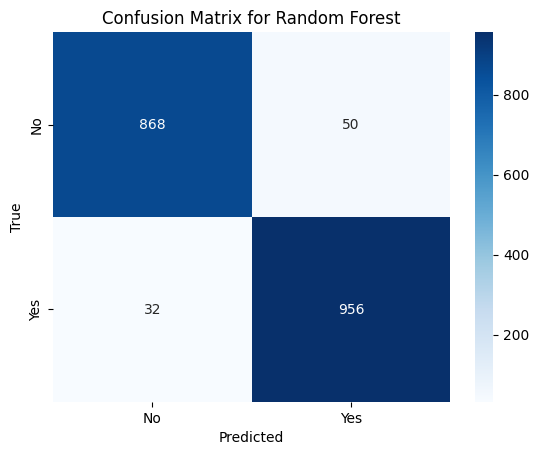

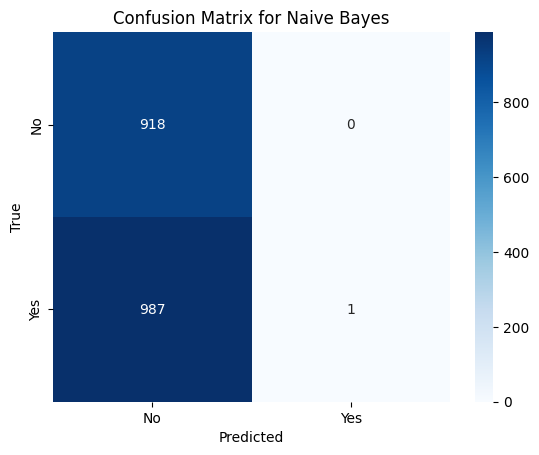

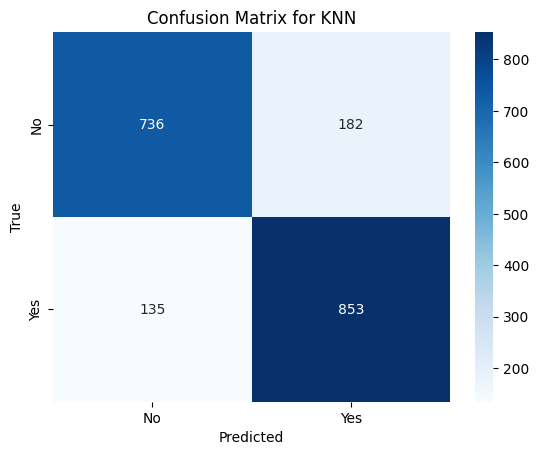

In [ ]:
for model_name, (model, y_pred) in models.items():
    plot_confusion_matrix(y_val, y_pred, model_name)

# Выводы:

* Общий анализ моделей:
Все модели показали хорошие результаты, с точностью, превышающей 80%, что является хорошим признаком для задач классификации. Однако, наибольшие показатели продемонстрировали модели, использующие градиентный бустинг, такие как LightGBM, XGBoost и CatBoost, что свидетельствует о высоком качестве этих алгоритмов при работе с табличными данными.

* Лучшие модели:
Модели LightGBM, XGBoost и CatBoost показали наилучшие результаты с точностью выше 99%. Эти методы, известные своей скоростью и точностью, могут быть рекомендованы для подобных задач. Они также обеспечивают лучшую стабильность и способность обрабатывать более сложные зависимости в данных.

* Логистическая регрессия:
В то время как логистическая регрессия, как собственная реализация, так и версия от sklearn, показала хорошие результаты (точность около 90%), её способности ограничены в случаях, когда данные требуют более сложных моделей. Это отражает ограничения линейных моделей, которые плохо справляются с нелинейными зависимостями.

* Модели с меньшей производительностью:
Модели, такие как SVM и Naive Bayes, показали относительно низкую точность, особенно Naive Bayes, которая даже имела точность ниже 50%. Это может быть связано с тем, что данные содержат сильные корреляции, которые плохо обрабатываются методом наивного байеса. Также SVM показала точность около 88%, что не является выдающимся результатом.

* Итоговая оценка:
Важно отметить, что F1-меры для моделей, таких как XGBoost и LightGBM, находятся на очень высоком уровне, что говорит о хорошей сбалансированности между точностью и полнотой этих моделей.

* Роль метрик в задаче:
Наиболее информативной метрикой в данной задаче является Recall. Эта метрика критична в задачах, связанных с кредитными заявками, поскольку важно не пропустить те заявки, которые должны быть одобрены. Ошибки, связанные с ложными срабатываниями (когда отклоняется заявка, которая должна быть одобрена), более дорогостоящи, чем ложные одобрения (когда одобряется заявка, которую нужно отклонить).

* Влияние предобработки данных:
Предобработка данных, включая нормализацию и преобразование категориальных переменных, оказала позитивное влияние на работу моделей, улучшив их стабильность и способность справляться с разнообразными данными.
